In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statistics
import warnings
import seaborn as sns
import random as rd
import sys
sys.path.append('../scripts')
from eda_Read_data import ReadData
from eda_cleaning_data import Cleaning_excel_data
from eda_plot import Plot
# Importing the SimpleImputer class from sklearn
from sklearn.impute import SimpleImputer

### Importing Data

In [3]:
loader = ReadData()
sample_df = loader.read_csv('../data/sample_submission.csv')
sample_df.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [4]:
store_df = loader.read_csv('../data/store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
test_df = loader.read_csv('../data/test.csv')
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
train_df = loader.read_csv('../data/train.csv')
train_df.head()

c:\Users\Stella\Desktop\Week 3\10Academy-Pharmaceutical-Sales-prediction-Project\notebooks\../scripts\eda_Read_data.py:44: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
train_store = pd.merge(train_df, store_df, how = 'left', on = "Store")
test_store = pd.merge(test_df, store_df, how = 'left', on = "Store")

In [8]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
test_store.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


### Investigating the data

In [10]:
#To show data types of each row
test_store.dtypes

Id                             int64
Store                          int64
DayOfWeek                      int64
Date                          object
Open                         float64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [11]:
#To show data types of each row
train_store.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [12]:
test_store.dtypes

Id                             int64
Store                          int64
DayOfWeek                      int64
Date                          object
Open                         float64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [13]:
train_store.shape

(1017209, 18)

In [14]:
test_store.shape

(41088, 17)

In [15]:
# Find missing values
train_store.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [16]:
test_store.isna().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

### Data Cleaning

In [17]:
#Instantiating the class to clean data
cleaner=Cleaning_excel_data()


In [18]:
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_most_frequent = imp_most_frequent.fit(test_store[['PromoInterval']])
imp_most_frequent = imp_most_frequent.fit(train_store[['PromoInterval']])
test_store['PromoInterval'] = imp_most_frequent.transform(test_store[['PromoInterval']]).ravel()
train_store['PromoInterval'] = imp_most_frequent.transform(train_store[['PromoInterval']]).ravel()

In [19]:
#imp_median = SimpleImputer(missing_values=np.nan, strategy='most_frequent')




#test_store['PromoInterval'].fillna(0, inplace=True)

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median = imp_median.fit(test_store[['CompetitionDistance']])
imp_median = imp_median.fit(train_store[['CompetitionDistance']])
test_store['CompetitionDistance'] = imp_median.transform(test_store[['CompetitionDistance']]).ravel()
train_store['CompetitionDistance'] = imp_median.transform(train_store[['CompetitionDistance']]).ravel()

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median = imp_median.fit(test_store[['CompetitionOpenSinceYear']])
test_store['CompetitionOpenSinceYear'] = imp_median.transform(test_store[['CompetitionOpenSinceYear']]).ravel()

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median = imp_median.fit(test_store[['CompetitionOpenSinceYear']])
test_store['CompetitionOpenSinceYear'] = imp_median.transform(test_store[['CompetitionOpenSinceYear']]).ravel()

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median = imp_median.fit(test_store[['Promo2SinceWeek']])
test_store['Promo2SinceWeek'] = imp_median.transform(test_store[['Promo2SinceWeek']]).ravel()
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median = imp_median.fit(test_store[['Promo2SinceWeek']])
test_store['Promo2SinceYear'] = imp_median.transform(test_store[['Promo2SinceYear']]).ravel()
imputer = SimpleImputer(strategy='constant',
                        missing_values=np.nan, fill_value=0)
imp_median = imp_median.fit(test_store[['Open']])
test_store['Open'] = imp_median.transform(test_store[['Open']]).ravel()
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median = imp_median.fit(test_store[['CompetitionOpenSinceYear']])
test_store['CompetitionOpenSinceYear'] = imp_median.transform(test_store[['CompetitionOpenSinceYear']]).ravel()


C:\Users\Stella\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Promo2SinceYear
Feature names seen at fit time, yet now missing:
- Promo2SinceWeek

  warnings.warn(message, FutureWarning)


In [20]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median = imp_median.fit(test_store[['CompetitionOpenSinceMonth']])
test_store['CompetitionOpenSinceMonth'] = imp_median.transform(test_store[['CompetitionOpenSinceMonth']]).ravel()

In [21]:
test_store.isna().sum()

Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [22]:
#imp_median = SimpleImputer(missing_values=np.nan, strategy='most_frequent')



#train_store['PromoInterval'].fillna(0, inplace=True)

# imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
# imp_median = imp_median.fit(train_store[['CompetitionDistance']])
# train_store['CompetitionDistance'] = imp_median.transform(train_store[['CompetitionDistance']]).ravel()

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median = imp_median.fit(train_store[['CompetitionOpenSinceYear']])
train_store['CompetitionOpenSinceYear'] = imp_median.transform(train_store[['CompetitionOpenSinceYear']]).ravel()

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median = imp_median.fit(train_store[['CompetitionOpenSinceYear']])
train_store['CompetitionOpenSinceYear'] = imp_median.transform(train_store[['CompetitionOpenSinceYear']]).ravel()

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median = imp_median.fit(train_store[['Promo2SinceWeek']])
train_store['Promo2SinceWeek'] = imp_median.transform(train_store[['Promo2SinceWeek']]).ravel()
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median = imp_median.fit(train_store[['Promo2SinceWeek']])
train_store['Promo2SinceYear'] = imp_median.transform(train_store[['Promo2SinceYear']]).ravel()
imputer = SimpleImputer(strategy='constant',
                        missing_values=np.nan, fill_value=0)
imp_median = imp_median.fit(train_store[['Open']])
train_store['Open'] = imp_median.transform(train_store[['Open']]).ravel()
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median = imp_median.fit(train_store[['CompetitionOpenSinceYear']])
train_store['CompetitionOpenSinceYear'] = imp_median.transform(train_store[['CompetitionOpenSinceYear']]).ravel()
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_most_frequent = imp_most_frequent.fit(train_store[['PromoInterval']])
train_store['PromoInterval'] = imp_most_frequent.transform(train_store[['PromoInterval']]).ravel()

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median = imp_median.fit(train_store[['CompetitionOpenSinceMonth']])
train_store['CompetitionOpenSinceMonth'] = imp_median.transform(train_store[['CompetitionOpenSinceMonth']]).ravel()

C:\Users\Stella\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Promo2SinceYear
Feature names seen at fit time, yet now missing:
- Promo2SinceWeek

  warnings.warn(message, FutureWarning)


In [23]:
train_store.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Converting dates to year, month in train dataset

In [24]:
# extracting year and month from Date 
train_store['Year']  = train_store['Date'].apply(lambda x: int(str(x)[:4]))
train_store['Month'] = train_store['Date'].apply(lambda x: int(str(x)[5:7]))

In [25]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,2015-07-31,5263,555,1.0,1,0,1,c,a,1270.0,9.0,2008.0,0,22.0,22.0,"Jan,Apr,Jul,Oct",2015,7
1,2,5,2015-07-31,6064,625,1.0,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7
2,3,5,2015-07-31,8314,821,1.0,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7
3,4,5,2015-07-31,13995,1498,1.0,1,0,1,c,c,620.0,9.0,2009.0,0,22.0,22.0,"Jan,Apr,Jul,Oct",2015,7
4,5,5,2015-07-31,4822,559,1.0,1,0,1,a,a,29910.0,4.0,2015.0,0,22.0,22.0,"Jan,Apr,Jul,Oct",2015,7


### Generation of month and year from date in test dataframe

<AxesSubplot:>

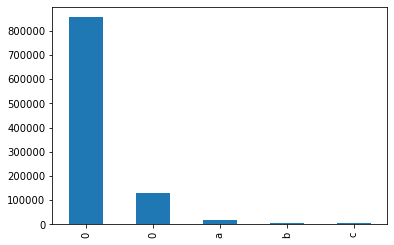

In [26]:
train_store['StateHoliday'].value_counts().plot(kind='bar')

In [27]:
# extracting year and month from Date 
test_store['Year']  = test_store['Date'].apply(lambda x: int(str(x)[:4]))
test_store['Month'] = test_store['Date'].apply(lambda x: int(str(x)[5:7]))

In [28]:
test_store.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,22.0,22.0,"Jan,Apr,Jul,Oct",2015,9
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,22.0,22.0,"Jan,Apr,Jul,Oct",2015,9
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,22.0,22.0,"Jan,Apr,Jul,Oct",2015,9
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,22.0,22.0,"Jan,Apr,Jul,Oct",2015,9


### Exploration on the test dataset

In [29]:
plot= Plot()

## Univariate analysis

In [30]:
plot= Plot()

### Comparing the promotion distribution between the train and test datasets

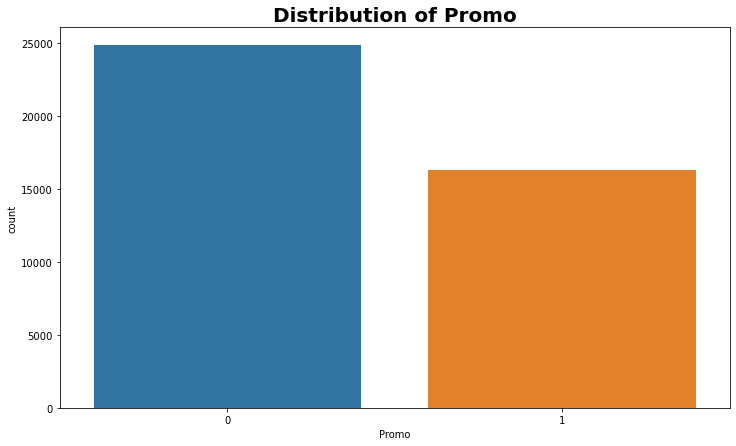

In [31]:
plot.plot_count(test_store, 'Promo')

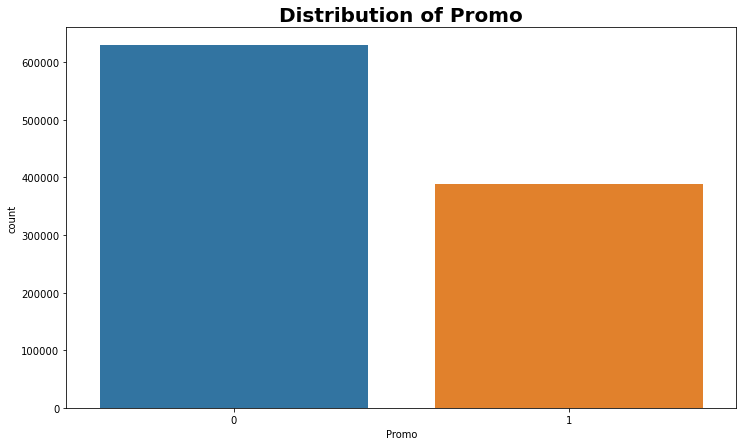

In [32]:
plot.plot_count(train_store, 'Promo')

The distribution shows that promotions are more for the train dataset than  test dataset 

## Bivariate Analysis

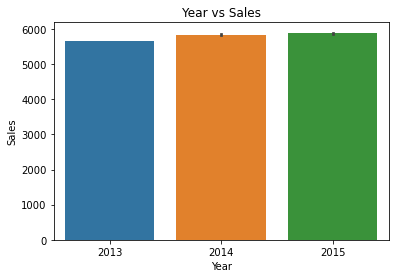

In [33]:
# Sales with respect to year 
sns.barplot(x='Year', y='Sales', data=train_store).set(title='Year vs Sales')
plt.show()

More sales were made in 2015.

### Day of week Vs open

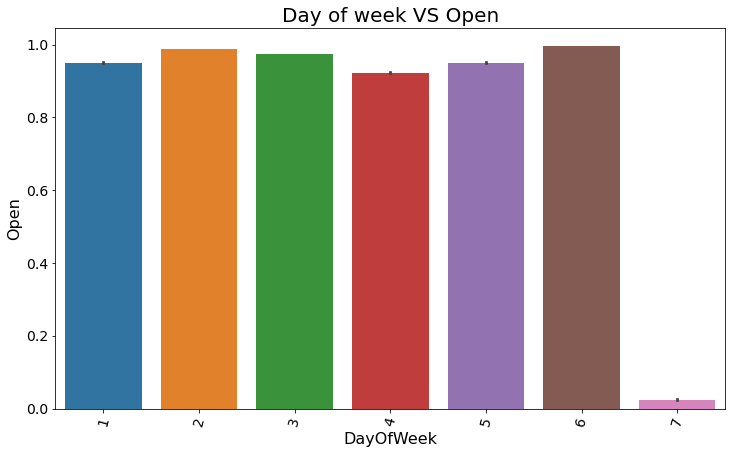

In [34]:
plot.plot_bar(train_store,"DayOfWeek","Open","Day of week VS Open", "DayOfWeek","Open")

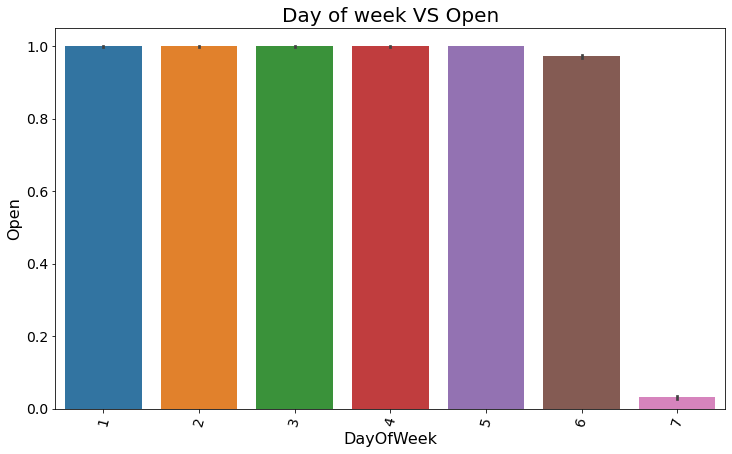

In [35]:
plot.plot_bar(test_store,"DayOfWeek","Open","Day of week VS Open", "DayOfWeek","Open")

The distribution plots show that most stores normally remain closed on Last day of the week


###    Open VS State Holidays

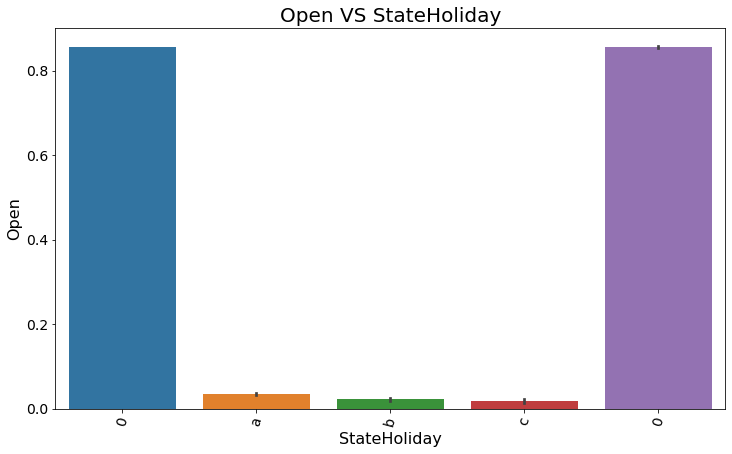

In [39]:
plot.plot_bar(train_store,"StateHoliday","Open","Open VS StateHoliday", "StateHoliday","Open")

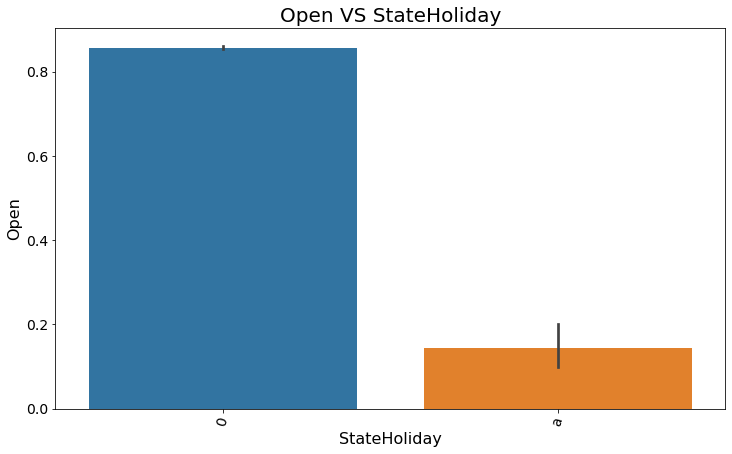

In [40]:
plot.plot_bar(test_store,"StateHoliday","Open","Open VS StateHoliday", "StateHoliday","Open")

The visualization indicates that most stores remain closed during state holidays, but few stores are open on public holidays.

### Open Vs School Holiday

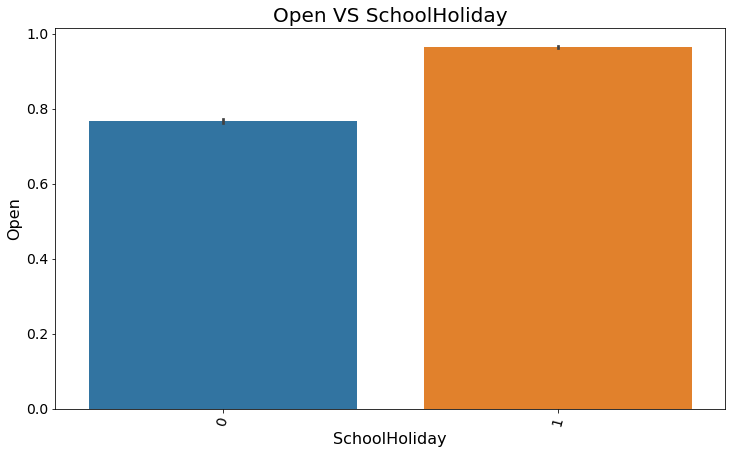

In [37]:
plot.plot_bar(test_store,"SchoolHoliday","Open","Open VS SchoolHoliday", "SchoolHoliday","Open")

### More stores are open on school holidays than when there is no school holiday. However school holidays do not affect the opening of stores as much as state holidays.

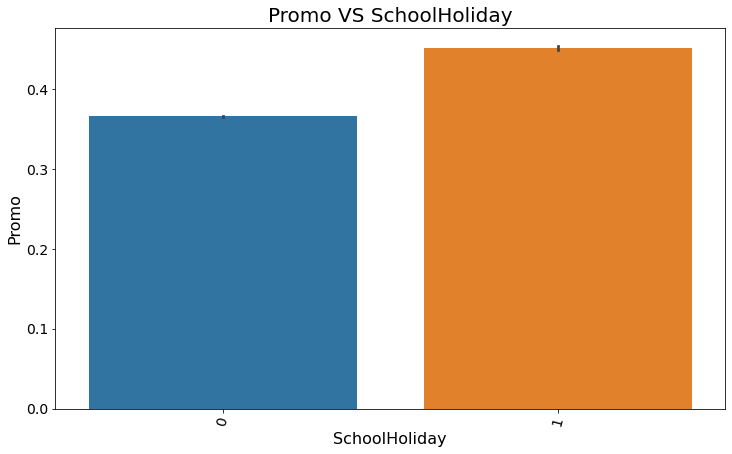

In [38]:
plot.plot_bar(train_store,"SchoolHoliday","Promo","Promo VS SchoolHoliday", "SchoolHoliday","Promo")

### This shows that more promotions are available during school holidays

### Promotions VS State Holidays

1. What is the relation between sales and holidays?

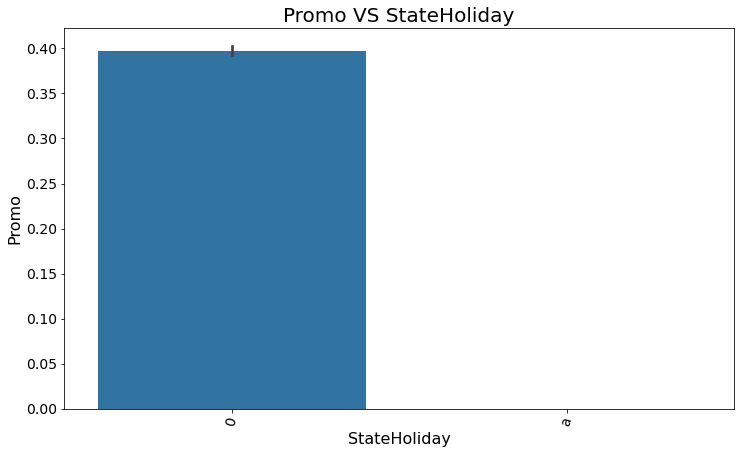

In [82]:
plot.plot_bar(test_store,"StateHoliday","Promo","Promo VS StateHoliday", "StateHoliday","Promo")

This shows that no promotions are available during state holidays in the test data

### Promo Vs state Holiday

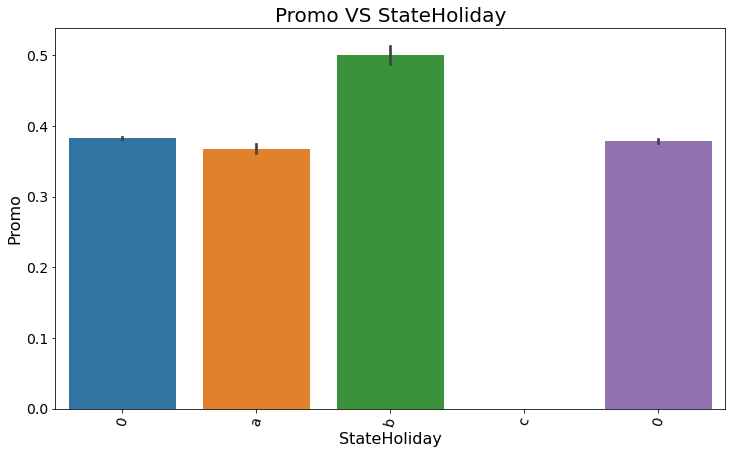

In [83]:
plot.plot_bar(train_store,"StateHoliday","Promo","Promo VS StateHoliday", "StateHoliday","Promo")

a = public holiday, b = Easter holiday, c = Christmas, 0 = None
### The plot shows that most promotions are available during the easter holidays

### Promo Vs School holiday

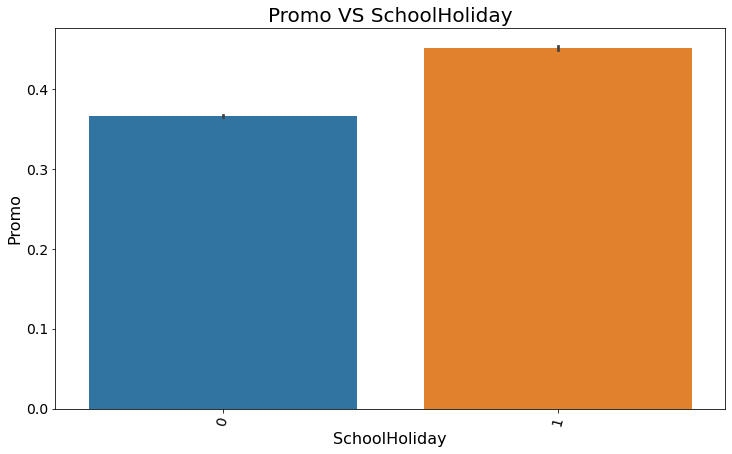

In [84]:
plot.plot_bar(train_store,"SchoolHoliday","Promo","Promo VS SchoolHoliday", "SchoolHoliday","Promo")

There are more promotions available when there is a school holiday

### Promo VS Sales

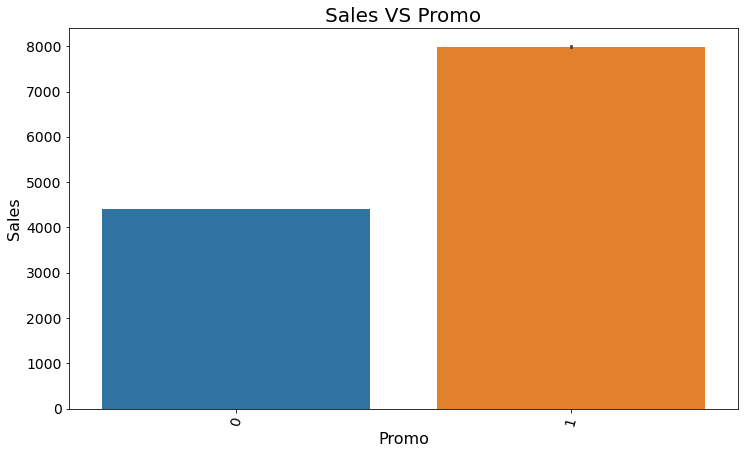

In [85]:
plot.plot_bar(train_store,"Promo","Sales","Sales VS Promo", "Promo","Sales")

### Stores make more sales when there is a promotion on

## Seasonality check

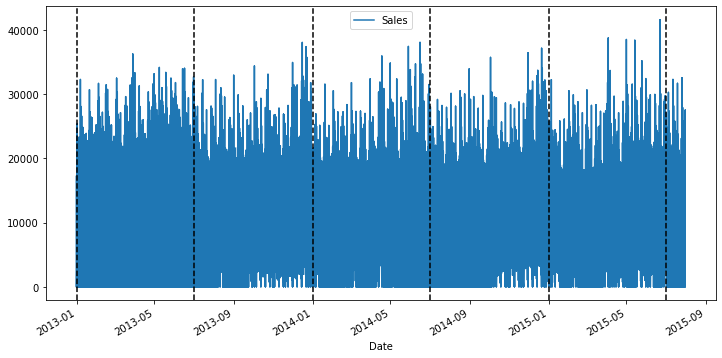

In [71]:
train_store['Date'] = pd.to_datetime(train_store['Date']) # convert date column to DateTime
ax = train_store.plot(x='Date', y='Sales', figsize=(12,6))

xcoords = ['2013-01-01', '2014-01-01','2015-01-01','2015-07-01', '2013-07-01', '2014-07-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

In [74]:
cond = (train_store['SchoolHoliday'] == 1) 
result = train_store[cond].Date.values
result

array(['2015-07-31T00:00:00.000000000', '2015-07-31T00:00:00.000000000',
       '2015-07-31T00:00:00.000000000', ...,
       '2013-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

There is a spike in sales during school holidays

## Sales Vs StateHoliday

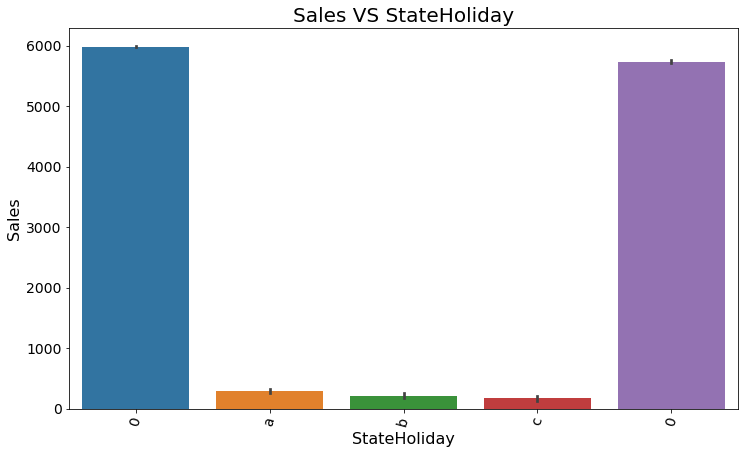

In [48]:
plot.plot_bar(train_store,"StateHoliday","Sales","Sales VS StateHoliday", "StateHoliday","Sales")

Less sales are made when there is a state Holiday since most staore are closed

## Sales vs SchoolHoliday

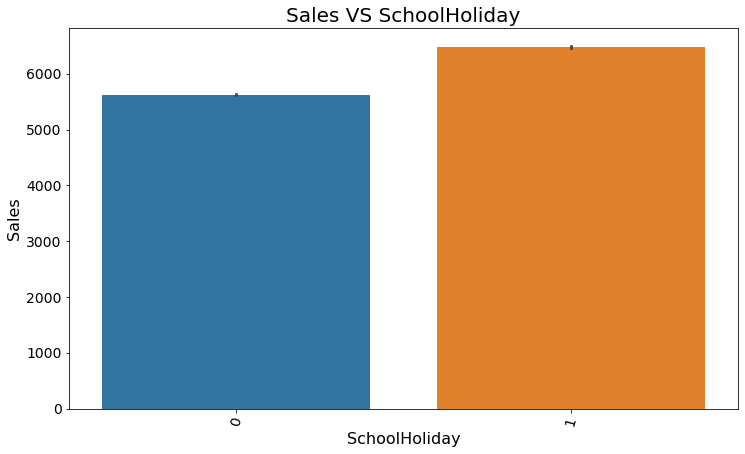

In [49]:
plot.plot_bar(train_store,"SchoolHoliday","Sales","Sales VS SchoolHoliday", "SchoolHoliday","Sales")

### More sales are made during School holidays

## Analysis of customers and Promotions

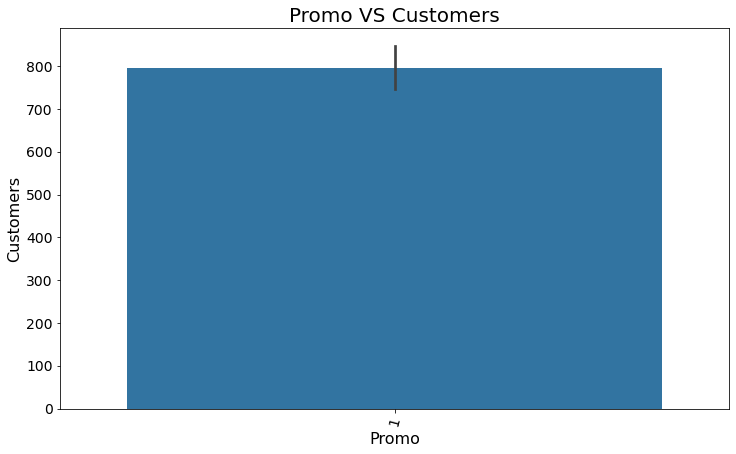

In [43]:
plot.plot_bar(train_store.head(100),"Promo","Customers","Promo VS Customers", "Promo","Customers")

In [55]:
train_store.columns.to_list()

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'Year',
 'Month']

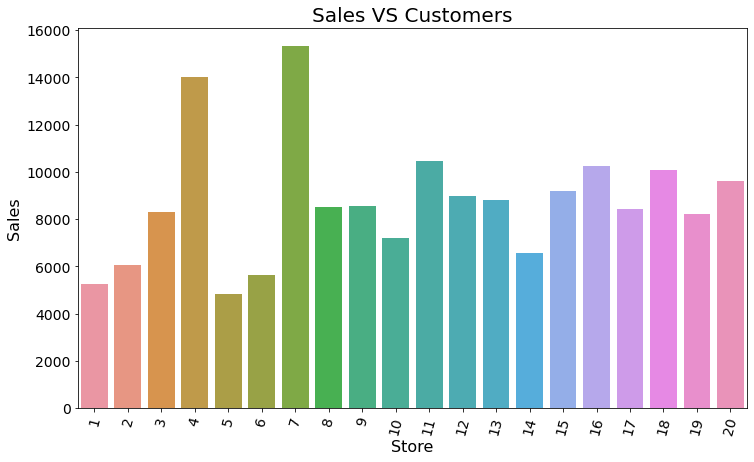

In [56]:
plot.plot_bar(train_store.head(20),"Store","Sales","Sales VS Customers", "Store","Sales")

Competition Analysis

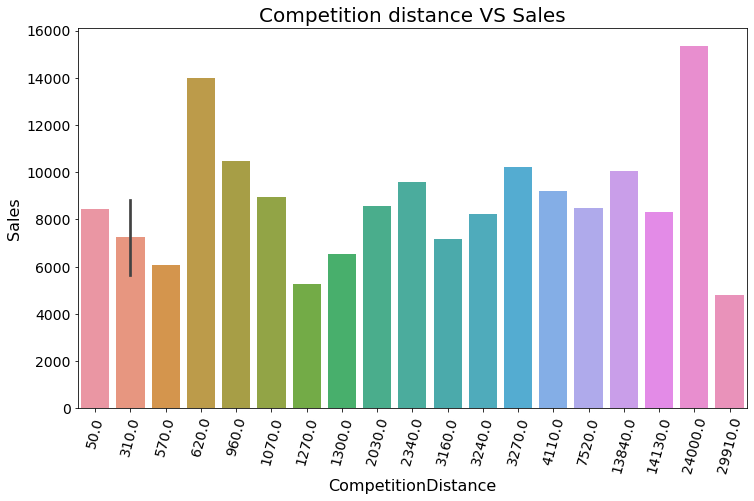

In [49]:
plot.plot_bar(train_store.head(20),'CompetitionDistance',"Sales","Competition distance VS Sales", 'CompetitionDistance',"Sales")

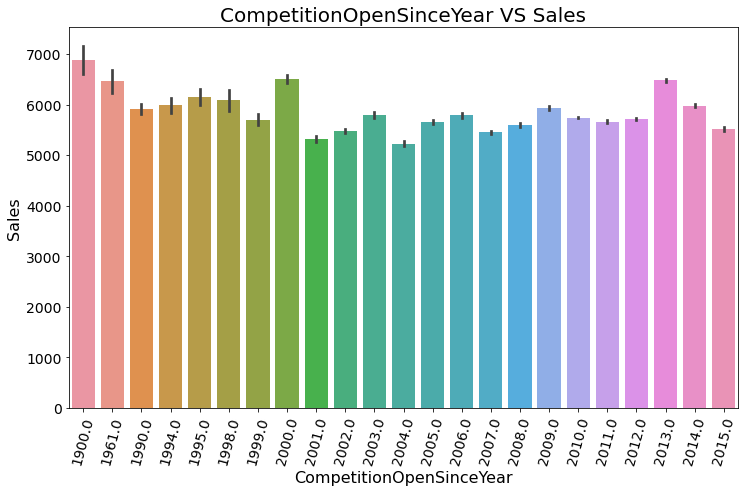

In [62]:
plot.plot_bar(train_store,'CompetitionOpenSinceYear',"Sales","CompetitionOpenSinceYear VS Sales", 'CompetitionOpenSinceYear',"Sales")